<a href="https://colab.research.google.com/github/nika-va/ML_Summary_of_Weather_project/blob/main/Algorithms_Comparison_Summary_of_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install bayesian-optimization
!pip install scikit-optimize
!pip install category_encoders
!pip install xgboost

In [ ]:
# main libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from category_encoders.hashing import HashingEncoder

# import algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import PoissonRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# metrics
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error, \
                            r2_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization, UtilityFunction
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import uniform, poisson
from sklearn.gaussian_process.kernels import RBF, DotProduct

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Summary of Weather.csv', usecols=['STA', 'Precip','MaxTemp', 'MinTemp', 'YR', 'MO', 'DA'])
data.head()

,STA,Precip,MaxTemp,MinTemp,YR,MO,DA
0,10001,1.016,25.555556,22.222222,42,7,1
1,10001,0,28.888889,21.666667,42,7,2
2,10001,2.54,26.111111,22.222222,42,7,3
3,10001,2.54,26.666667,22.222222,42,7,4
4,10001,0,26.666667,21.666667,42,7,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STA      119040 non-null  int64  
 1   Precip   119040 non-null  object 
 2   MaxTemp  119040 non-null  float64
 3   MinTemp  119040 non-null  float64
 4   YR       119040 non-null  int64  
 5   MO       119040 non-null  int64  
 6   DA       119040 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 6.4+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['STA'].nunique()

159

In [ ]:
data['Precip'].value_counts()

Precip
0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In [ ]:
precipitation_numeric = data['Precip'].replace('T', '0.01')
precipitation_numeric = pd.to_numeric(precipitation_numeric)
data['Precip'] = precipitation_numeric.astype(float)

In [ ]:
data.value_counts()

STA    Precip  MaxTemp    MinTemp    YR  MO  DA
34139  0.000   37.222222  16.111111  45  6   24    2
       0.010   30.555556  20.000000  45  6   27    2
       0.000   38.333333  18.333333  45  6   25    2
               30.000000  20.000000  45  6   28    2
       0.508   35.000000  18.888889  45  6   21    2
                                                  ..
13007  0.000   21.111111  3.888889   45  2   1     1
                                     44  3   16    1
                          3.333333   45  2   9     1
                          2.777778   45  3   3     1
82506  65.024  20.555556  15.000000  45  6   10    1
Name: count, Length: 119030, dtype: int64

(0.0, 10.0)

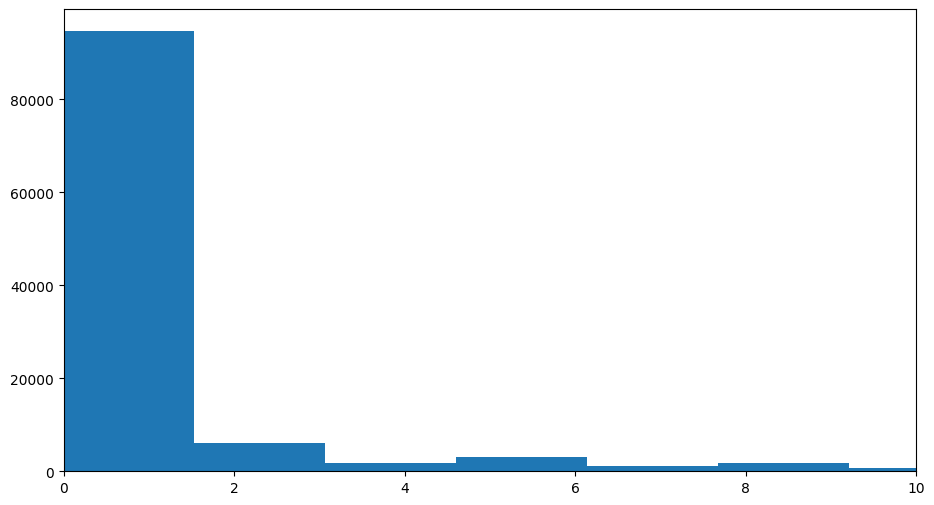

In [ ]:
fig = plt.figure(figsize=(11,6))
plt.hist(precipitation_numeric.astype(int), bins=200)
plt.xlim(0, 10)

In [ ]:
he = HashingEncoder(cols=['STA']).fit(data)
data = he.transform(data)

In [ ]:
cols_to_scale = ['Precip',	'MaxTemp',	'MinTemp', 'YR',	'MO',	'DA']
data[cols_to_scale] = preprocessing.StandardScaler().fit_transform(data[cols_to_scale])

In [ ]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Precip,MaxTemp,MinTemp,YR,MO,DA
0,0,1,0,0,0,0,0,0,-0.204713,-0.170864,0.531849,-1.588161,0.079982,-1.682588
1,0,1,0,0,0,0,0,0,-0.298782,0.211496,0.465192,-1.588161,0.079982,-1.568881
2,0,1,0,0,0,0,0,0,-0.063610,-0.107137,0.531849,-1.588161,0.079982,-1.455174
3,0,1,0,0,0,0,0,0,-0.063610,-0.043411,0.531849,-1.588161,0.079982,-1.341466
4,0,1,0,0,0,0,0,0,-0.298782,-0.043411,0.465192,-1.588161,0.079982,-1.227759


In [ ]:
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Precip,MaxTemp,MinTemp,YR,MO,DA
0,0,1,0,0,0,0,0,0,-0.204713,-0.170864,0.531849,-1.588161,0.079982,-1.682588
1,0,1,0,0,0,0,0,0,-0.298782,0.211496,0.465192,-1.588161,0.079982,-1.568881
2,0,1,0,0,0,0,0,0,-0.063610,-0.107137,0.531849,-1.588161,0.079982,-1.455174
3,0,1,0,0,0,0,0,0,-0.063610,-0.043411,0.531849,-1.588161,0.079982,-1.341466
4,0,1,0,0,0,0,0,0,-0.298782,-0.043411,0.465192,-1.588161,0.079982,-1.227759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,0,0,0,0,0,0,0,1,-0.298782,0.147770,0.065249,1.051027,1.539604,1.273804
119036,0,0,0,0,0,0,0,1,0.618391,0.275223,0.065249,1.051027,1.539604,1.387511
119037,0,0,0,0,0,0,0,1,-0.298782,0.147770,0.065249,1.051027,1.539604,1.501218
119038,0,0,0,0,0,0,0,1,-0.298782,0.147770,0.065249,1.051027,1.539604,1.614926


In [ ]:
X = data.drop('MaxTemp', axis=1)
y = data['MaxTemp']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Feature Importance

In [ ]:
# decision tree feature importances
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_

Feature: 0, Score: 0.00401
Feature: 1, Score: 0.00460
Feature: 2, Score: 0.00362
Feature: 3, Score: 0.00428
Feature: 4, Score: 0.00436
Feature: 5, Score: 0.00289
Feature: 6, Score: 0.00257
Feature: 7, Score: 0.00325
Feature: 8, Score: 0.03935
Feature: 9, Score: 0.83064
Feature: 10, Score: 0.02087
Feature: 11, Score: 0.03046
Feature: 12, Score: 0.04910


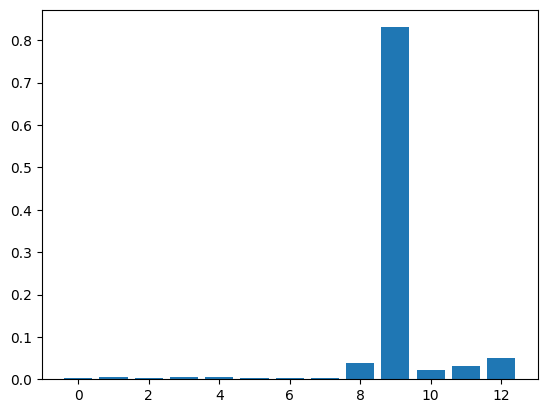

In [ ]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.03394
Feature: 1, Score: 0.01241
Feature: 2, Score: 0.05893
Feature: 3, Score: 0.03244
Feature: 4, Score: 0.01563
Feature: 5, Score: 0.02014
Feature: 6, Score: 0.01540
Feature: 7, Score: 0.01039
Feature: 8, Score: 0.06224
Feature: 9, Score: 0.70235
Feature: 10, Score: 0.01735
Feature: 11, Score: 0.01467
Feature: 12, Score: 0.00412


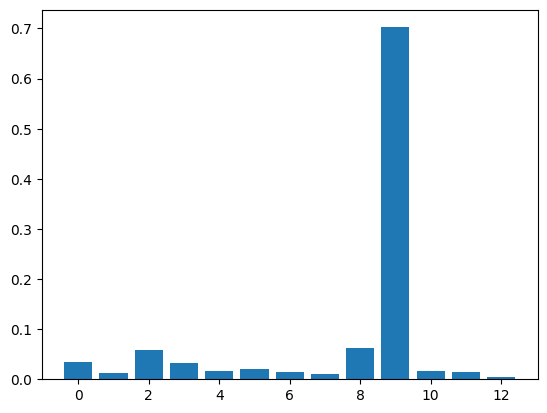

In [ ]:
from xgboost import XGBRegressor

# xgboost feature importances
model = XGBRegressor()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Algorithms Comparison with cross validation

In [ ]:
# Linear Regression/ Polynomial Regression
# SVR
# Decision Tree
# Random Forest
# Ridge/ Lasso Regression
# Poisson Regression
# Gaussian Regression

In [ ]:
scores_r2 = {}
scores_mae = {}
scores_mse = {}
scores_rmse = {}

In [ ]:
def show_scores():
  print(f'''r2 score: {scores_r2},
mae score: {scores_mae},
mse score: {scores_mse},
rmse score: {scores_rmse}''')

Linear Regression

In [ ]:
lin1 = LinearRegression()
lin1.fit(X_train, y_train)

LinearRegression()

In [ ]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(lin1, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Linear Regression'] = np.average(score_lr)

Scoring metric: r2
[0.8006176  0.78867319 0.79534965 0.79852416 0.79788601]
Avg : 0.796210122679969


Scoring metric: neg_mean_absolute_error
[-0.34880445 -0.35067208 -0.34782492 -0.34939331 -0.35436625]
Avg : -0.35021220383106844


Scoring metric: neg_mean_squared_error
[-0.20596704 -0.21208556 -0.20599018 -0.21004032 -0.21497034]
Avg : -0.20981068732254218


Scoring metric: neg_root_mean_squared_error
[-0.45383592 -0.46052748 -0.45386141 -0.45830156 -0.46364894]
Avg : -0.45803506102390906




Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train.to_numpy())

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(lin2, poly.fit_transform(X_test.to_numpy()), y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Polynomial Regression'] = np.average(score_lr)

Scoring metric: r2
[0.83337664 0.83109333 0.83327797 0.83003583 0.82879487]
Avg : 0.8313157262532631


Scoring metric: neg_mean_absolute_error
[-0.30986195 -0.30781959 -0.30830451 -0.31262795 -0.31211889]
Avg : -0.3101465776721347


Scoring metric: neg_mean_squared_error
[-0.17212614 -0.16951312 -0.16781354 -0.17718913 -0.18209539]
Avg : -0.1737474623194894


Scoring metric: neg_root_mean_squared_error
[-0.41488087 -0.41171971 -0.40965051 -0.42093839 -0.42672636]
Avg : -0.41678316819469946




Support Vector Machine (SVR)

In [ ]:
# param_dist = {'kernel': [
# 		#  'sigmoid',
# 		 'linear'
# 		 ],
#               'C' : [10, 100, 200]}

# svr = SVR()
# random_search = RandomizedSearchCV(
# 	svr, param_distributions=param_dist, n_iter=5,
# 	scoring='r2', cv=3, verbose=2, random_state=2024
# )
# random_search.fit(X_train, y_train)

# svr = random_search.best_estimator_
# random_search.best_params_

In [ ]:
# param_dist = {'kernel': ['sigmoid', 'poly'],
#               'C' : [10, 100, 200]}

# svr = SVR()
# svr.fit(X_train, y_train)

In [ ]:
# scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
# scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(dt, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Decision Tree'] = np.average(score_lr)

In [ ]:
# scores_r2
# scores_mae
# scores_mse
# scores_rmse

Decision Tree

In [ ]:
param_dist = {
    'max_leaf_nodes':np.arange(3,26).tolist()
}
random_search = RandomizedSearchCV(
	DecisionTreeRegressor(), param_distributions=param_dist, n_iter=25,
	scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=2024)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 3 folds for each of 23 candidates, totalling 69 fits


{'max_leaf_nodes': 25}

In [ ]:
dt = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes= 25, )

In [ ]:
dt = dt.fit(X_train, y_train)

In [ ]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(dt, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Decision Tree'] = np.average(score_lr)

Scoring metric: r2
[0.838446   0.82911496 0.83875887 0.83186873 0.83806919]
Avg : 0.8352515502147954


Scoring metric: neg_mean_absolute_error
[-0.30146317 -0.30241082 -0.29543523 -0.3054617  -0.30706726]
Avg : -0.3023676355277599


Scoring metric: neg_mean_squared_error
[-0.16688935 -0.17149859 -0.16229676 -0.17527831 -0.17223113]
Avg : -0.16963882936450833


Scoring metric: neg_root_mean_squared_error
[-0.40852093 -0.41412388 -0.40286072 -0.41866253 -0.41500739]
Avg : -0.41183509026392306




Random Forest

In [ ]:
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)],
              #  'max_depth': [int(x) for x in np.linspace(5, 50, num = 5)],
              #  'min_samples_split': [2, 5, 10],
              #  'min_samples_leaf':  [1, 2, 4],
              #  'bootstrap': [True, False]
              }

In [ ]:
# rf = RandomForestRegressor(n_estimators= 100,
#                           min_samples_split= 2,
#                           min_samples_leaf= 2,
#                           max_features= 'auto',
#                           max_depth= 5,
#                           bootstrap= True)

# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 3, cv = 3, verbose=3, random_state=42, n_jobs = -1)
# rf = rf_random.fit(X_train, y_train)


In [ ]:
# scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
# scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(rf, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Random Forest Regressor'] = np.average(score_lr)

Ridge Regression

In [ ]:
RidgeRegression = Ridge()

hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)

rr = RidgeRegression.fit(X_train, y_train)

In [ ]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(rr, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Ridge Regressor'] = np.average(score_lr)

Scoring metric: r2
[0.80061941 0.78866714 0.79535707 0.79853266 0.79791494]
Avg : 0.7962182433705209


Scoring metric: neg_mean_absolute_error
[-0.34879908 -0.35082506 -0.34782303 -0.34936877 -0.35454177]
Avg : -0.35027154239829345


Scoring metric: neg_mean_squared_error
[-0.20596518 -0.21209163 -0.2059827  -0.21003146 -0.21493957]
Avg : -0.20980210904587496


Scoring metric: neg_root_mean_squared_error
[-0.45383386 -0.46053407 -0.45385317 -0.45829189 -0.46361576]
Avg : -0.4580257530317426




Lasso Regression


In [ ]:
LassoRegression = Lasso()

hyperParameters = {'alpha':[1e-15,1e-8,1e-2,1,5,10,20,30,40,50,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)

lr = LassoRegressor.fit(X_train, y_train)

In [ ]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(lr, X_test, y_test,cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Lasso Regressor'] = np.average(score_lr)

Scoring metric: r2
[0.80061842 0.78866702 0.79535687 0.79853273 0.7979158 ]
Avg : 0.7962181682546134


Scoring metric: neg_mean_absolute_error
[-0.34880249 -0.35082643 -0.34782508 -0.34937081 -0.3545435 ]
Avg : -0.3502736612085647


Scoring metric: neg_mean_squared_error
[-0.2059662  -0.21209175 -0.20598291 -0.21003138 -0.21493866]
Avg : -0.20980217952295138


Scoring metric: neg_root_mean_squared_error
[-0.45383499 -0.4605342  -0.4538534  -0.4582918  -0.46361478]
Avg : -0.45802583470719027




Poisson Regressor

In [ ]:
poisson = PoissonRegressor( )
y_train_filtered = y_train[y_train >= 0]
X_train_filtered = X_train[y_train >= 0]

# Train the model with filtered data
poisson_reg = poisson.fit(X_train_filtered, y_train_filtered)

In [ ]:
scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

for x, score_dict in zip(scores, scores_dict):
  score_lr = cross_val_score(poisson_reg, X_test[y_test >= 0], y_test[y_test >= 0],cv=5, scoring=x)
  print('Scoring metric:', x)
  print(score_lr)
  print("Avg :",np.average(score_lr))
  print('\n')
  score_dict['Poisson Regressor'] = np.average(score_lr)

Scoring metric: r2
[0.02319288 0.02401225 0.02528225 0.02485944 0.02260527]
Avg : 0.02399041936759925


Scoring metric: neg_mean_absolute_error
[-0.24879179 -0.2569533  -0.24833649 -0.25736855 -0.25937103]
Avg : -0.25416423028022017


Scoring metric: neg_mean_squared_error
[-0.12288155 -0.12522246 -0.11939532 -0.13112527 -0.13115889]
Avg : -0.12595670053485603


Scoring metric: neg_root_mean_squared_error
[-0.35054465 -0.35386786 -0.34553629 -0.36211224 -0.36215865]
Avg : -0.35484393764274647




Gaussian Regressor

In [ ]:
# kernel = 1 * RBF(length_scale=1.0)
# gaussian_process = GaussianProcessRegressor(kernel=kernel,
#                                             n_restarts_optimizer=5
#                                             )
# gaussian_process.fit(X_train, y_train)

In [ ]:
# scores = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
# scores_dict = [scores_r2, scores_mae, scores_mse, scores_rmse]

# for x, score_dict in zip(scores, scores_dict):
#   score_lr = cross_val_score(gaussian_process, X_test, y_test,cv=5, scoring=x)
#   print('Scoring metric:', x)
#   print(score_lr)
#   print("Avg :",np.average(score_lr))
#   print('\n')
#   score_dict['Gaussian Regressor'] = np.average(score_lr)

In [ ]:
show_scores()

r2 score: {'Linear Regression': 0.796210122679969, 'Polynomial Regression': 0.8313157262532631, 'Decision Tree': 0.8352515502147954, 'Ridge Regressor': 0.7962182433705209, 'Lasso Regressor': 0.7962181682546134, 'Poisson Regressor': 0.02399041936759925},
mae score: {'Linear Regression': -0.35021220383106844, 'Polynomial Regression': -0.3101465776721347, 'Decision Tree': -0.3023676355277599, 'Ridge Regressor': -0.35027154239829345, 'Lasso Regressor': -0.3502736612085647, 'Poisson Regressor': -0.25416423028022017},
mse score: {'Linear Regression': -0.20981068732254218, 'Polynomial Regression': -0.1737474623194894, 'Decision Tree': -0.16963882936450833, 'Ridge Regressor': -0.20980210904587496, 'Lasso Regressor': -0.20980217952295138, 'Poisson Regressor': -0.12595670053485603},
rmse score: {'Linear Regression': -0.45803506102390906, 'Polynomial Regression': -0.41678316819469946, 'Decision Tree': -0.41183509026392306, 'Ridge Regressor': -0.4580257530317426, 'Lasso Regressor': -0.458025834707

Comparing :

Text(0.5, 1.0, 'R2 Scores')

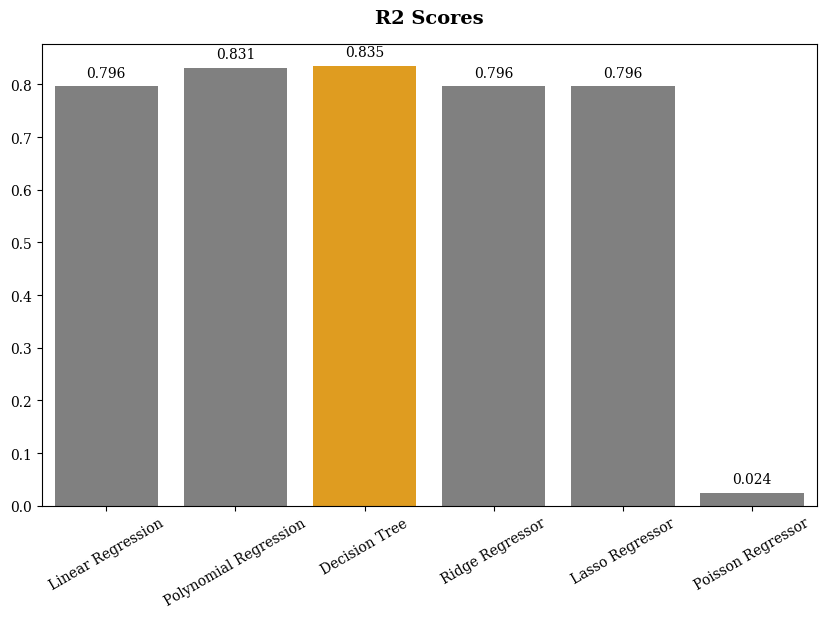

In [ ]:
# plotting R2 scores

plt.figure(figsize=(10,6))
plt.rcParams["font.family"] = "serif"

cols = ['grey' if (x < max(scores_r2.values())) else 'orange' for x in scores_r2.values()]
ax = sns.barplot(scores_r2, x=scores_r2.keys(), y=scores_r2.values(), palette=cols)
ax.set_xticklabels(scores_r2.keys(),rotation=30)
# plt.ylim(0.95, 1.00)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set_title('R2 Scores', fontdict={'fontsize': 14, 'fontweight': 'semibold'}, pad=15)
